lat =  35.690155 42.136677
lon =  -124.45009 -113.741455
Shape of NEI array =  (12, 20, 169, 215)


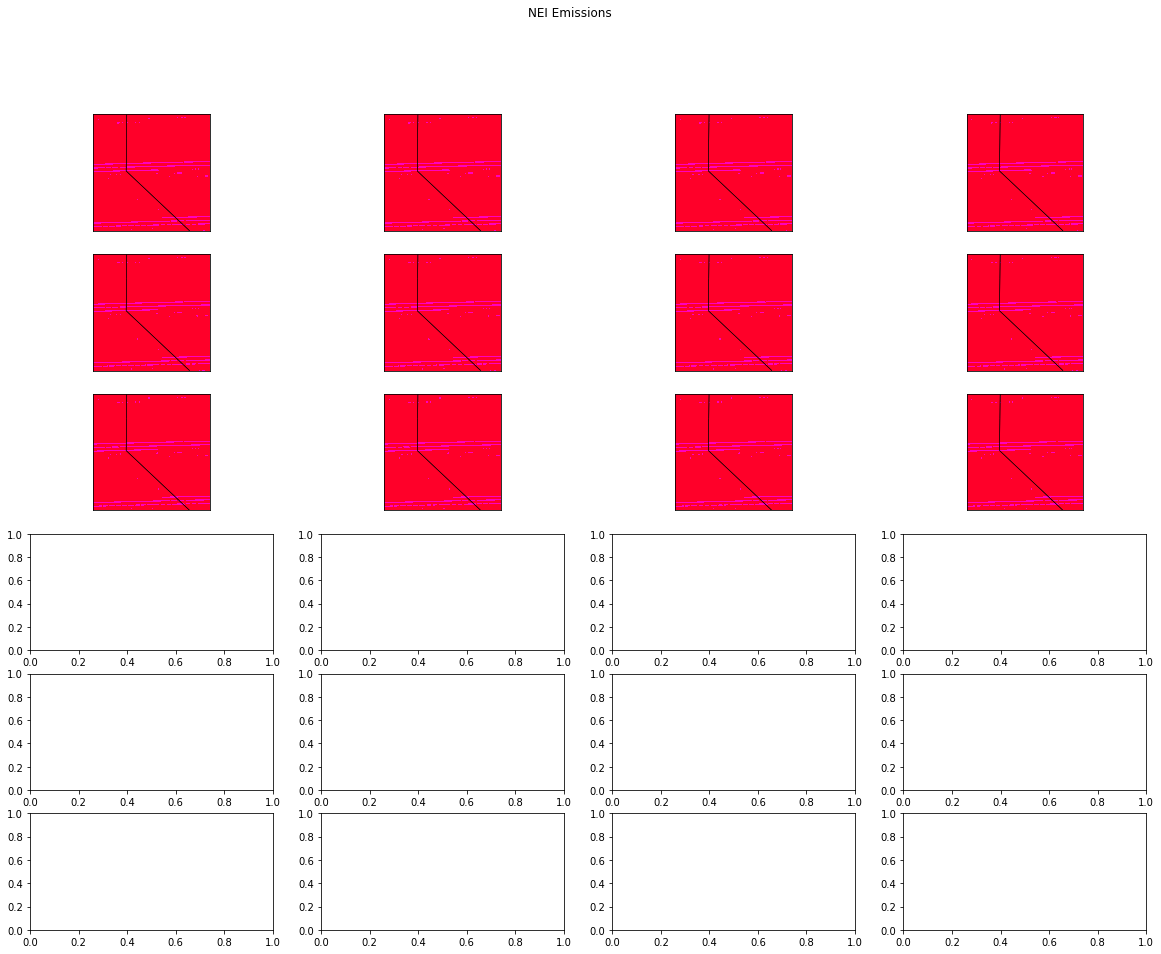

In [32]:
# This code plots emission data from netCDF files

from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap
from time import sleep
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')


out1 = Dataset('wrfinput_d01', mode='r')
lon = out1.variables['XLONG'][0][:]
lat = out1.variables['XLAT'][0][:]
out1.close()
lon0 = lon.mean()
lat0 = lat.mean()
latmax = lat.max()
latmin = lat.min()
lonmax = lon.max()
lonmin = lon.min()

print('lat = ', latmin, latmax)
print('lon = ', lonmin, lonmax)

m = Basemap(width=400000,height=400000, projection='lcc',resolution = 'l',lat_0=lat0,lon_0=lon0)
xi, yi = m(lon,lat)

def makemap(tra):
    m.drawstates()
    m.drawcoastlines()
    m.pcolor(xi,yi,tra,vmin=0,vmax=1e-12, cmap='gist_rainbow');

I = 170 - 1
J = 215 
H = 12
N = 6
M = 4

filen = 'wrfchemi_00z_d01'
fileID = Dataset(filen, mode='r')
data = fileID.variables['E_CO'][:][:][:][:]
print('Shape of NEI array = ', data.shape)
fileID.close()

fig,axs = plt.subplots(N,M,figsize=(20,15))
fig.suptitle('NEI Emissions')

for i in range(0,H): # Hours
#     caxx = fig.add_axes([0.85,0.1,0.03,0.8])
#     plt.subplots_adjust(wspace=0.5, right=0.8, top=0.9, bottom=0.1)
    plt.subplot(N,M,i+1)
    makemap(data[i,19,:,:])
    
    

# for i in range(22,23): # dates
#     for j in range(0,24): # Hours
#         outname = pref+str(i)+"_%02d" %j + suff
#         print(outname)
#         fig,axs = plt.subplots(N,M,figsize=(25,20))
#         caxx = fig.add_axes([0.85,0.1,0.03,0.8])
#         plt.subplots_adjust(wspace=0.5, right=0.8, top=0.9, bottom=0.1)
#         fig.suptitle('Aug ' + str(i) + " %02d" %j + ':00:00')
#         out = Dataset(outname, mode='r')
#         for q in range(1,T): # Tracer
#             trname='tr17_'+str(q)
#             tr[:,:,k,q] = out.variables[trname][0][0][:]
#             plt.subplot(N,M,q)
#             plt.title(trname)
#             makemap(tr[:,:,k,q])
#         out.close()
#         picname = 'fig'+"%02d" %k+'.png'
#         plt.colorbar(cax=caxx, ax=axs)
#         plt.savefig(picname)
#         k += 1
